# Computación simbolica con Simpy

El cálculo simbólico se ocupa del cálculo de objetos matemáticos de forma simbólica. Esto significa que los objetos matemáticos se representan exactamente, no aproximadamente, y las expresiones matemáticas con variables no evaluadas se dejan en forma simbólica.

Aterricemos mejor el concepto de simbolo y a que nos referimos con "simbolico o númerico":

Pensemos en la raíz de 9

$$ \sqrt{9} = 3 $$

Tiene como solución un número entero bien definido.

Ahora en la raíz de 8

$$ \sqrt{8} = 2\sqrt{2} \approx 2.828427 $$

No existe número racional de la forma a/b o un número en la forma decimal que pueda representar propiamente el valor de $ \sqrt{8} $, por ello su valor suele representarse de forma simbólica.

Lo mismo pasa con otros números irracionales como $ \pi $ y $ e $.

Veamos la comparación de esto en Python:




In [44]:
# RAÍZ NUMERICA DE 8 

import numpy as np

np.sqrt(8)

In [45]:
# RAÍZ SIMBOLICA DE 8 
import sympy
sympy.sqrt(8)   

## Expresiones algebraícas simbolicas

Algo más interesante es el hecho de poder representar expresiones algebraícas y poder construir algunos sistemas más complejos:

$$ 3x+4y $$

Es una expresión algebraíca que la podemos expresar de forma simbolica en python

In [46]:
from sympy import symbols

x, y, z= symbols('x y z')
a, b, c = symbols('a b c')

expr = 3*x+4*y
expr


In [47]:
expr_2 = (a+b+c)**2
expr_2

Ahora podemos querer expresar la siguiente:

$$ (3x+4y)^{2} $$

In [48]:
expr_square = expr**2
expr_square

Podemos desarrollar una expresión algebraíca 


```
# expr.expand()
```



In [49]:
expanded_expr_square = expr_square.expand()
expanded_expr_square

Podemos factorizar una expresión algebraíca 


```
# expr.factor()
```

In [50]:
simplify_expr_square = expanded_expr_square.factor()
simplify_expr_square

El poder real de un sistema de cálculo simbólico como SymPy es la capacidad de realizar todo tipo de cálculos simbólicamente. SymPy puede calcular derivadas, integrales y límites, resolver ecuaciones, trabajar con matrices y mucho, mucho más, y hacerlo todo simbólicamente.



In [51]:
from sympy import *
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)

Ya definidas unas cuantas variables simbolicas, vamos a probar una serie de comandos básicos.



1.   Derivadas

$$ f(x) = e^{x} sin(x) $$
$$ f'(x) = e^{x}sin(x) + e^{x}cos(x) $$




diff(f,x)

f: función o expresión a diferenciar
x: La variable respecto a la que se deriva

In [52]:
f= exp(x)*sin(x)    # Creamos la función simbolica
diff(f,x)           # Diferenciamos f respecto a x

$
f(x)=e^{x}sin(x)+zcos(x)
$

In [53]:
f= exp(x)*sin(x)+z*cos(x)    # Creamos la función simbolica
diff(f,z)                    # Diferenciamos f respecto a x

Notemos como podemos definir funciones de una y más variables y tambien derivar respecto a distintas variables, es decir, derivadas parciales.

2. Integrales

$$ \int \frac{1}{x} dx = ln(x) + C  $$

Podemos integrar con la función integrate():

integrate(f, x)

f: integrando
x: varaible respecto a la cual se está integrando

In [54]:
integrando = 1/x

integrate(integrando, x)

$
\int \frac{1}{x}dt = \frac{t}{x} + c
$

In [55]:
integrando = 1/x

integrate(integrando, t)

$
\int e^{x^{2}} dx = \frac{\sqrt{\pi}}{2} erfi(x) + C
$

In [56]:
integrando = exp(x**2)

integrate(integrando, x)

In [57]:
diff(integrate(integrando, x), x)

Ahora pongamos limites de integración:

$$ \int_{0}^{\frac{\pi}{2}} e^{x}cos(x) dx  $$

Si tenemos limites de integración:

integrate(f, (x, a, b))

f: Integrando


x: Variable respecto a la cual vamos a integrar


a: límite inferior de integración


b: límite superior de integración

$$
\int_{a}^{b} f(x)dx 
$$

In [58]:
integrando= exp(x)*cos(x)

integrate(integrando, (x, 0, pi/2))


$$\int_{-\infty}^{\infty} \sin{(x^2)} dx  $$

In [59]:
integrando = sin(x**2)

integrate(integrando, (x, -oo, oo))


Nota: Podemos hablar del simbolo $\infty$ como: oo (dos veces la letra 'o')

3. Expansión por series

Tratemos de hacer la expasión por series de algunas expresiones algebraícas

$$ sin(x) = x - \frac{x^{3}}{6} + \frac{x^{5}}{120} $$

$$ cos(x) = 1 - \frac{x^{2}}{2} + \frac{x^{4}}{24} $$



```
# f(x).series(x, x0, n)
```

f(x) : función que se va a expresar como serie de potencias

x : la variable independendiente de la función

x0 : el número al rededor del cual se hace la expansión

n : los primeros n términos de la serie



In [60]:
seno = sin(x)
seno.series(x, 0, 6)

In [61]:
coseno = cos(x)
coseno.series(x, 0, 6).removeO()

4. Ecuaciones diferenciales

Encontrar las ecuaciones de movimiento y velocidad respecto al tiempo de una particula que se mueve en un medio resistente en una trayectoria parabólica con las siguientes condiciones iniciales :

$$ x(t=0)= 0 = y(t=0) $$
$$ \dot{x} (t=0)= V_{o}Cos{\theta} $$
$$ \dot{y} (t=0)= V_{o}Sin{\theta} $$


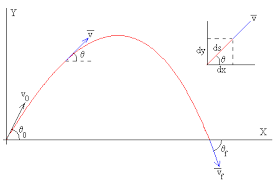

Las ecuaciones de movimiento que describen la trayectoria del sistema son:

$$ m\ddot{x} + km\dot{x} = 0$$
$$ m\ddot{y} + km\dot{y} + mg = 0 $$

 Vamos a tratar de resolverlo de forma símbolica 

Hacer ecuaciones 

Eq(expr_1, expr_2)

expr_1: expresión del lado izquierdo de la igualdad
expr_2: expresión del lado derecho de la igualdad

In [62]:
# Definición de simbolos 

x, y = symbols('x y', cls=Function)    # Funciones
m, k, g, t, Vo, w = symbols(' m k g t Vo w')            # Parametros (ctes)

              # Pt. Izquierda igualdad            # Pt. derecha
deqn_1 = Eq( m*x(t).diff(t).diff(t)+k*m*x(t).diff(t) ,  0 )      # Ecn. diferencial 1
deqn_2 = Eq( m*y(t).diff(t).diff(t)+k*m*y(t).diff(t)+m*g , 0 )      # Ecn. diferencial 2


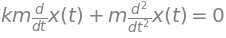

In [63]:
deqn_1

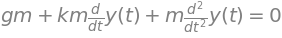

In [64]:
deqn_2

Resolvemos sin condiciones inciales:

dsolve(ecn_d, f(x))

ecn_d: ecuación diferencial a resolver
f(x) : función que vamos a resolver

In [65]:
dsolve(deqn_1, x(t))

In [66]:
dsolve(deqn_2, y(t))

A continuación resolvemos con condiciones inciales:

In [67]:
# x(0) = 0 : x(0):0
# x'(0)= VoCos(w) : sym.diff(x(t), t).subs(t,0): Vo*cos(w)

# y(0) = 0 : x(0):0
# y'(0)= VoSen(w) : sym.diff(x(t), t).subs(t,0): Vo*cos(w)

ics_deqn_1 = { x(0): 0, diff(x(t), t).subs(t,0): Vo*cos(w) }
ics_deqn_2 = { y(0): 0, diff(y(t), t).subs(t,0): Vo*sin(w) }

# para que quede más claro como funciona cada parte
# x'(t) : sym.diff(x(t), t)
# x'(0) : sym.diff(x(t), t).subs(t,0)
# y'(t) : sym.diff(y(t), t)
# y'(0) : sym.diff(y(t), t).subs(t,0)

RESOLVEMOS ECN. DIFERENCIAL 1 CON CONDICIONES INICIALES

dsolve(ecn_d, ics)

ecn_d: ecuación diferencial a resolver
ics: son las condiciones iniciales

In [68]:
pos_eqn_1 = dsolve(deqn_1,ics=ics_deqn_1) # reemplazando condiciones iniciales
pos_eqn_1

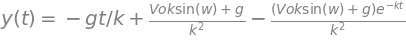

In [69]:
pos_eqn_2 = dsolve(deqn_2,ics=ics_deqn_2) # reemplazando condiciones iniciales
pos_eqn_2

Hemos obtenido las expresione para la posición en función del tiempo, ahora obtengamos las siguientes expresiones



* Velocidad
* Energía cinetica
* Energía potencial
* Energía mécanica



In [70]:
# VELOCIDAD (componente X)
# trabajaremos con la expresión de la parte izquierda de la ecuación de posición

pos_1 = pos_eqn_1.rhs    # X(t)
pos_2 = pos_eqn_2.rhs    # Y(t)

vel_1 = pos_1.diff(t)    # X'(t)
vel_2 = pos_2.diff(t)    # Y'(t)


In [71]:
vel_1

In [72]:
vel_2

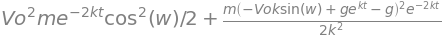

In [73]:
# ENERGÍA CINETICA

K_energy = Rational(1,2)*m*(vel_1**2).simplify() + Rational(1,2)*m*(vel_2**2).simplify()
K_energy

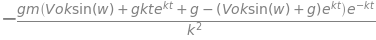

In [74]:
# ENERGIA POTENCIAL

U_energy = m*g*pos_2
U_energy = U_energy.simplify()
U_energy

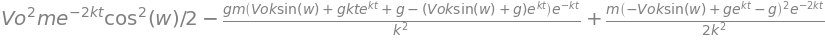

In [75]:
# ENERÍA MÉCANICA

M_energy = U_energy + K_energy
M_energy

Asignamos unos parametros definidos:

In [76]:
pos_1= pos_1.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])
pos_2= pos_2.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])
vel_1= vel_1.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])
vel_2= vel_2.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])

K_energy= K_energy.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])
U_energy= U_energy.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])
M_energy= M_energy.subs([(g,9.8),(m,3),(Vo,120),(w,pi/4),(k,0.5)])

In [77]:
pos_2

In [78]:
solve(Eq(pos_2, 0), t)

Podemos pasar de expresiones simbolicas a númericas y aprovechar librerías como matplotlib para realizar gráficas

In [79]:
# SYMPY (símbolico) ----->  NUMPY (númerico)
# variable independiente, expresión, librería

np_vel_1 = lambdify(t,vel_1,'numpy')        # velocidad X'(t)
np_pos_1 = lambdify(t,pos_1,'numpy')        # posición  X(t)

np_vel_2=lambdify(t,vel_2,'numpy')        # velocidad Y'(t)
np_pos_2=lambdify(t,pos_2,'numpy')        # posición  Y(t)

np_K_energy = lambdify(t,K_energy,'numpy')   # E. Cinetica
np_U_energy = lambdify(t,U_energy,'numpy')   # E. Potencial
np_M_energy = lambdify(t,M_energy,'numpy')   # E. Mécanica

Trataremos de encontrar una gráfica con la trayectoria, con la expresión númerica

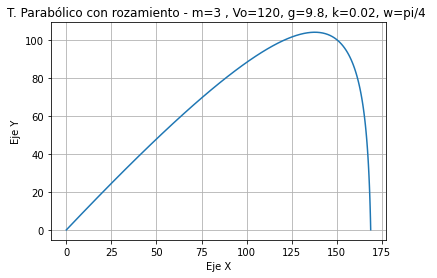

In [81]:
import matplotlib.pyplot as plt

t = np.linspace(0,10.6,100)
X = np_pos_1(t)
Y = np_pos_2(t)

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('T. Parabólico con rozamiento - m=3 , Vo=120, g=9.8, k=0.5, w=pi/4 ')
plt.plot(X,Y)
plt.grid()